In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv("nba23data.csv")
advanced = pd.read_csv("nba23advanced.csv")
df = data.merge(advanced, on='Player').drop_duplicates()

df.head()

,Rk_x,Player,Pos_x,Age_x,Tm_x,G_x,GS,MP_x,FG,FGA,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,...,NaN,0.8,1.4,2.2,0.093,NaN,-1.4,-0.8,-2.3,-0.1
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,NaN,1.3,2.1,3.4,0.144,NaN,-0.3,0.9,0.6,0.7
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,...,NaN,3.6,3.8,7.4,0.137,NaN,0.8,0.8,1.5,2.3
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,...,NaN,0.9,0.4,1.3,0.053,NaN,-1.7,-1.4,-3.0,-0.3
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,...,NaN,2.1,2.4,4.6,0.130,NaN,-0.3,0.8,0.5,1.1


In [45]:
df.columns


Index(['Rk_x', 'Player', 'Pos_x', 'Age_x', 'Tm_x', 'G_x', 'GS', 'MP_x', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Rk_y', 'Pos_y', 'Age_y', 'Tm_y', 'G_y', 'MP_y', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'Unnamed: 19', 'OWS', 'DWS', 'WS', 'WS/48', 'Unnamed: 24',
       'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [46]:
df = df.drop(columns = ['Pos_y', 'Age_y', 'Tm_y', 'G_y', 'MP_y', 'Unnamed: 19', 'Unnamed: 24'])
df = df.rename(columns={'Pos_x': 'Pos', 'Age_x': 'Age', 'Tm_x':'Tm', 'G_x':'G', 'MP_x':'MP', 'FG%':'FGP', '2P%':'2PP', '3P%':'3PP', 'FT%':'FTP', 'eFG%':'eFGP'})
df.dropna(inplace=True)

In [47]:
df['ppg'] = round(df['PTS'] / df['G'], 2)


In [48]:
df.sort_values(by=['ppg'], ascending=False)
df

,Rk_x,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ppg
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,...,19.4,0.8,1.4,2.2,0.093,-1.4,-0.8,-2.3,-0.1,9.24
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,14.6,1.3,2.1,3.4,0.144,-0.3,0.9,0.6,0.7,8.60
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,...,25.2,3.6,3.8,7.4,0.137,0.8,0.8,1.5,2.3,20.39
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,...,15.8,0.9,0.4,1.3,0.053,-1.7,-1.4,-3.0,-0.3,7.92
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,...,16.0,2.1,2.4,4.6,0.130,-0.3,0.8,0.5,1.1,9.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,535,Thaddeus Young,PF,34,TOR,54,9,795,108,198,...,13.5,0.7,1.1,1.8,0.109,-1.8,1.9,0.1,0.4,4.44
1095,536,Trae Young,PG,24,ATL,73,73,2541,597,1390,...,32.6,5.3,1.4,6.7,0.126,5.3,-2.0,3.3,3.4,26.22
1096,537,Omer Yurtseven,C,24,MIA,9,0,83,16,27,...,18.0,0.2,0.1,0.3,0.159,-2.5,-1.5,-3.9,0.0,4.44
1097,538,Cody Zeller,C,30,MIA,15,2,217,37,59,...,18.1,0.4,0.3,0.7,0.147,-2.0,-0.7,-2.8,0.0,6.53


In [49]:
df['MPG'] = df['MP']/df['G']

In [50]:
df = df[(df['MPG'] > 10) & (df['G'] >= 15)]
df.sort_values("MP")
temp =df.copy()

In [51]:
# Extract the players who have been traded 
traded = df[df['Tm'] == 'TOT']
traded = traded.drop_duplicates('Player')

traded_names = list(traded['Player'])

traded

,Rk_x,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ppg,MPG
5,6,Nickeil Alexander-Walker,SG,24,TOT,59,3,884,131,295,...,0.3,0.8,1.1,0.062,-1.4,0.4,-0.9,0.2,6.15,14.983051
37,22,Mo Bamba,C,24,TOT,49,7,769,117,241,...,1.1,1.1,2.2,0.139,-0.2,0.7,0.5,0.5,6.59,15.693878
53,30,Will Barton,SG,32,TOT,56,2,993,138,364,...,-0.4,0.8,0.4,0.021,-2.0,-0.6,-2.6,-0.2,6.77,17.732143
65,34,Darius Bazley,C,22,TOT,43,1,616,83,183,...,0.1,0.9,1.0,0.078,-2.0,1.0,-1.0,0.2,5.21,14.325581
75,36,Malik Beasley,SG,26,TOT,81,27,2093,370,937,...,-0.2,1.6,1.4,0.032,-0.9,-1.0,-2.0,0.0,12.65,25.839506
86,39,Patrick Beverley,SG-PG,34,TOT,67,67,1816,144,360,...,0.8,2.1,3.0,0.079,-2.9,1.7,-1.2,0.3,6.19,27.104478
95,40,Saddiq Bey,SF,23,TOT,77,37,2129,353,836,...,2.6,1.2,3.9,0.087,0.9,-1.2,-0.3,0.9,13.79,27.649351
105,42,Goga Bitadze,C,23,TOT,38,1,457,69,125,...,0.8,0.6,1.3,0.141,-0.8,1.1,0.3,0.3,4.39,12.026316
137,58,Mikal Bridges,SF-SG,26,TOT,83,83,2963,593,1267,...,4.4,3.1,7.5,0.121,1.5,0.2,1.7,2.8,20.13,35.698795
165,70,Thomas Bryant,C,25,TOT,59,26,1081,230,369,...,2.7,1.4,4.1,0.183,1.1,-0.5,0.6,0.7,9.81,18.322034


In [52]:
# Drop all the player that are in the traded_names list
df = df[~(df['Player'].isin(traded_names))]

# Added traded players back to df
df = pd.concat([df,traded])

# Clean df with all players once
df

,Rk_x,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ppg,MPG
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,...,0.8,1.4,2.2,0.093,-1.4,-0.8,-2.3,-0.1,9.24,20.727273
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,1.3,2.1,3.4,0.144,-0.3,0.9,0.6,0.7,8.60,26.976190
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,...,3.6,3.8,7.4,0.137,0.8,0.8,1.5,2.3,20.39,34.640000
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,...,0.9,0.4,1.3,0.053,-1.7,-1.4,-3.0,-0.3,7.92,20.491525
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,...,2.1,2.4,4.6,0.130,-0.3,0.8,0.5,1.1,9.04,21.844156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,477,Juan Toscano-Anderson,SF,29,TOT,52,9,700,64,143,...,-0.1,0.6,0.5,0.038,-4.6,0.8,-3.8,-0.3,2.98,13.461538
1011,484,Jarred Vanderbilt,PF,23,TOT,78,65,1879,247,451,...,2.7,2.5,5.2,0.132,-0.6,1.6,1.1,1.5,7.94,24.089744
1033,498,T.J. Warren,PF-SF,29,TOT,42,0,687,132,270,...,0.4,0.8,1.2,0.081,-1.7,-0.2,-2.0,0.0,7.48,16.357143
1050,507,Russell Westbrook,PG,34,TOT,73,24,2126,432,991,...,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2,15.88,29.123288


In [53]:
df

,Rk_x,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ppg,MPG
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,...,0.8,1.4,2.2,0.093,-1.4,-0.8,-2.3,-0.1,9.24,20.727273
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,1.3,2.1,3.4,0.144,-0.3,0.9,0.6,0.7,8.60,26.976190
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,...,3.6,3.8,7.4,0.137,0.8,0.8,1.5,2.3,20.39,34.640000
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,...,0.9,0.4,1.3,0.053,-1.7,-1.4,-3.0,-0.3,7.92,20.491525
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,...,2.1,2.4,4.6,0.130,-0.3,0.8,0.5,1.1,9.04,21.844156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,477,Juan Toscano-Anderson,SF,29,TOT,52,9,700,64,143,...,-0.1,0.6,0.5,0.038,-4.6,0.8,-3.8,-0.3,2.98,13.461538
1011,484,Jarred Vanderbilt,PF,23,TOT,78,65,1879,247,451,...,2.7,2.5,5.2,0.132,-0.6,1.6,1.1,1.5,7.94,24.089744
1033,498,T.J. Warren,PF-SF,29,TOT,42,0,687,132,270,...,0.4,0.8,1.2,0.081,-1.7,-0.2,-2.0,0.0,7.48,16.357143
1050,507,Russell Westbrook,PG,34,TOT,73,24,2126,432,991,...,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2,15.88,29.123288


# Exploratory Analysis

/var/folders/2d/j6jx9fpn50dg6jt20l4qwxth0000gn/T/ipykernel_1024/3322165627.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='vlag', vmin=-1, vmax=1)


Text(0.5, 1.0, 'Heatmap to Analyze Stat Relationships')

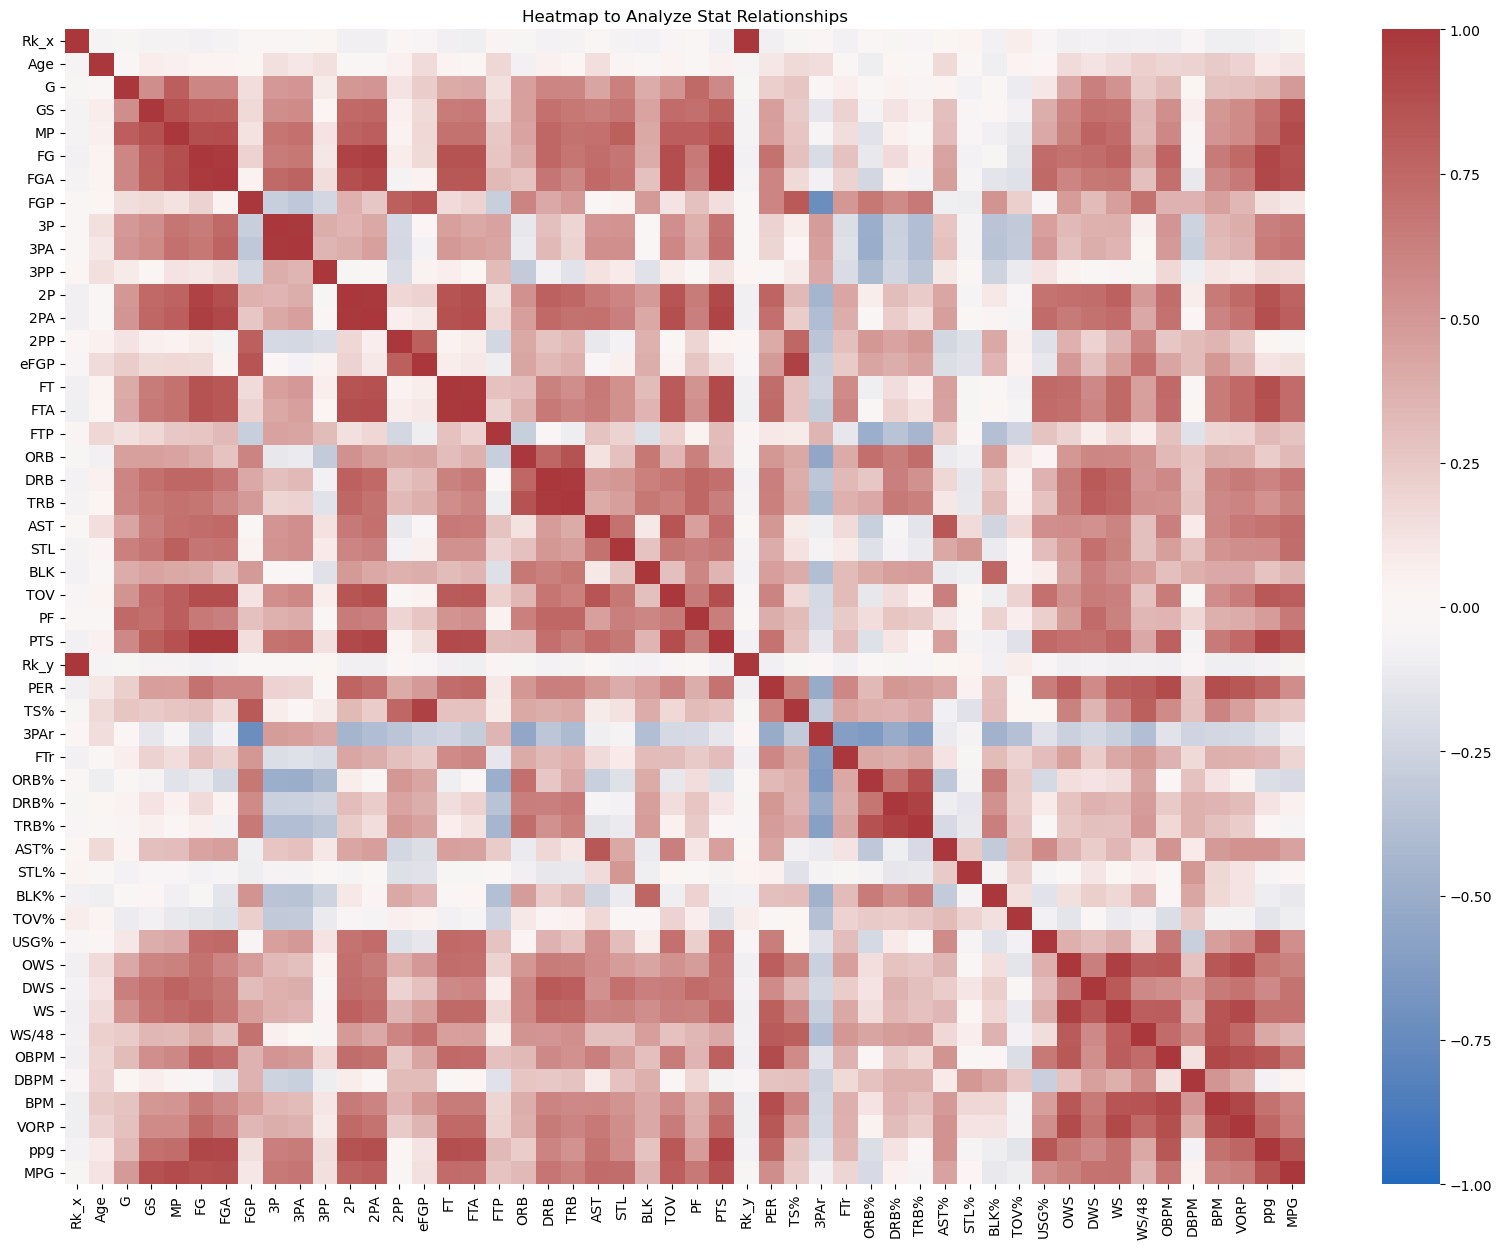

In [54]:
# Take a look to see the relationship between variables 
fig = plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap='vlag', vmin=-1, vmax=1)
plt.title('Heatmap to Analyze Stat Relationships')


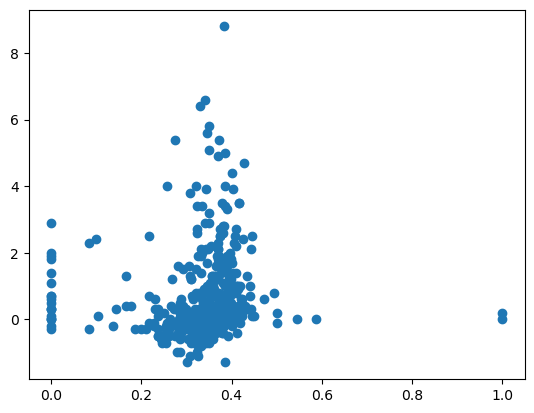

In [55]:
plt.scatter('3PP', 'VORP', data=df)

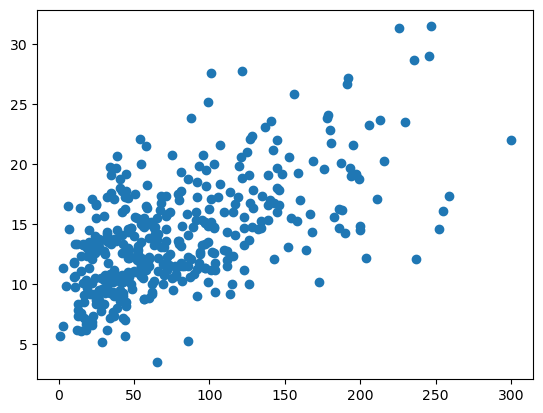

In [56]:
plt.scatter('TOV', 'PER', data=df)

# Creating WAR

In [57]:
averages = df[['Player', '2PP', '3PP', 'eFGP', 'FTP', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%']]
averages.set_index("Player", inplace=True)
averages[['TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%']] = averages[['TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%']].copy() / 100
average_list = list(averages.mean())

print(average_list)

[0.5427990074441689, 0.33246898263027297, 0.5432332506203474, 0.7672630272952854, 0.09950372208436725, 0.14236476426799008, 0.014699751861042186, 0.017349875930521095, 0.12199007444168734]


/var/folders/2d/j6jx9fpn50dg6jt20l4qwxth0000gn/T/ipykernel_1024/3559235062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  averages[['TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%']] = averages[['TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%']].copy() / 100


In [58]:
averages

,2PP,3PP,eFGP,FTP,TRB%,AST%,STL%,BLK%,TOV%
Player,,,,,,,,,
Precious Achiuwa,0.564,0.269,0.521,0.702,0.163,0.063,0.013,0.026,0.114
Steven Adams,0.599,0.000,0.597,0.364,0.227,0.112,0.015,0.037,0.198
Bam Adebayo,0.545,0.083,0.541,0.806,0.155,0.159,0.017,0.024,0.127
Ochai Agbaji,0.532,0.355,0.532,0.812,0.054,0.075,0.006,0.010,0.090
Santi Aldama,0.591,0.353,0.560,0.750,0.117,0.076,0.013,0.026,0.093
...,...,...,...,...,...,...,...,...,...
Juan Toscano-Anderson,0.560,0.186,0.476,0.792,0.095,0.118,0.011,0.012,0.181
Jarred Vanderbilt,0.604,0.322,0.580,0.691,0.167,0.131,0.021,0.009,0.159
T.J. Warren,0.542,0.328,0.530,0.800,0.098,0.087,0.016,0.015,0.065


In [59]:
# efficiency WAR weights
weights = [0.12, 0.16, 0.28, 0.08, 0.04, 0.32, 0.48, 0.48, -0.48]

zero_war = 0
for i in range(len(weights)):
    zero_war += weights[i] * average_list[i]

print(f"The Average Player currently has a {round(zero_war,3)} WAR")

The Average Player currently has a 0.338 WAR


In [60]:
# Test our formula on Precious Achiuwa
achiuwa = averages.iloc[:1].values

total = 0
for i in range(len(weights)):
    total += weights[i] * achiuwa[0][i]
    
print("Precious Achiuwa's WAR is", round(total,7))

Precious Achiuwa's WAR is 0.30344


In [61]:
### Don't know if this is necessary, but if we're comparing to "average" player then I think we would want to compare player
# to the average. I don't know if we should go even further and standardize them by scaling the values by the std

# Subtract the players to the mean so that all stats are in context of "player vs average player" 
demeaned = averages-averages.mean()

# Calculate war for every player using our weights
#average player has a WAR of 0
#scaled up to an 82 game season
demeaned['Efficiency WAR'] = np.dot(demeaned, weights) * 82
demeaned.sort_values('Efficiency WAR', ascending=False)

,2PP,3PP,eFGP,FTP,TRB%,AST%,STL%,BLK%,TOV%,Efficiency WAR
Player,,,,,,,,,,
Nikola Jokić,0.132201,0.050531,0.116767,0.054737,0.102496,0.323635,0.0033,0.00065,0.04801,12.098056
Tyrese Haliburton,0.029201,0.067531,0.042767,0.103737,-0.039504,0.333635,0.0083,-0.00635,0.01001,11.143576
Nick Richards,0.085201,0.667531,0.087767,-0.018263,0.082496,-0.097365,-0.0107,0.03365,0.00801,9.795496
Luka Dončić,0.045201,0.009531,0.016767,-0.025263,0.038496,0.280635,0.0043,-0.00535,-0.00299,8.355576
Stephen Curry,0.036201,0.094531,0.070767,0.147737,-0.002504,0.157635,-0.0017,-0.00835,0.00301,7.804536
...,...,...,...,...,...,...,...,...,...,...
Steven Adams,0.056201,-0.332469,0.053767,-0.403263,0.127496,-0.030365,0.0003,0.01965,0.07601,-7.804984
Nerlens Noel,-0.189799,0.167531,-0.168233,-0.100263,0.031496,-0.075365,0.0253,0.02765,0.11701,-8.585624
Daishen Nix,-0.119799,-0.046469,-0.117233,-0.100263,-0.040504,0.049635,0.0013,-0.01035,0.13201,-9.520424


Text(0.5, 1.0, 'Efficiency WAR Distribtion')

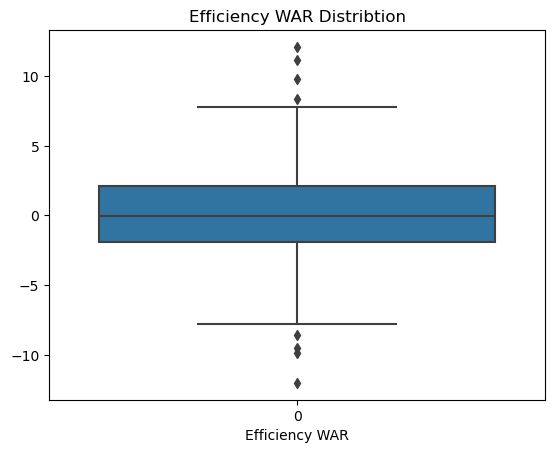

In [62]:
wars = list(demeaned['Efficiency WAR'])
w = sns.boxplot(wars)
w
plt.xlabel('Efficiency WAR')
plt.title('Efficiency WAR Distribtion')

In [63]:
demeaned.mean()['Efficiency WAR'] # average player now has 0 WAR

-3.1119303439617293e-15

In [64]:
avg_mins = sum(list(df['MP'])) / len(df)
avg_mins


1419.3697270471464

In [65]:
df['+/- ppg'] = (df['ppg'] - df['ppg'].mean()) / df['ppg'].mean()
df['+/- fga'] = (df['FGA'] - df['FGA'].mean()) / df['FGA'].mean()
df.head()

,Rk_x,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,WS,WS/48,OBPM,DBPM,BPM,VORP,ppg,MPG,+/- ppg,+/- fga
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,...,2.2,0.093,-1.4,-0.8,-2.3,-0.1,9.24,20.727273,-0.154649,-0.227178
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,3.4,0.144,-0.3,0.9,0.6,0.7,8.60,26.976190,-0.213202,-0.496900
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,...,7.4,0.137,0.8,0.8,1.5,2.3,20.39,34.640000,0.865444,1.131000
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,...,1.3,0.053,-1.7,-1.4,-3.0,-0.3,7.92,20.491525,-0.275414,-0.261610
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,...,4.6,0.130,-0.3,0.8,0.5,1.1,9.04,21.844156,-0.172947,0.004286


In [66]:
demeaned = demeaned.reset_index()
df = df.merge(demeaned, on='Player')
df

,Rk_x,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,2PP_y,3PP_y,eFGP_y,FTP_y,TRB%_y,AST%_y,STL%_y,BLK%_y,TOV%_y,Efficiency WAR
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,...,0.021201,-0.063469,-0.022233,-0.065263,0.063496,-0.079365,-0.0017,0.00865,-0.00799,-2.848904
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,0.056201,-0.332469,0.053767,-0.403263,0.127496,-0.030365,0.0003,0.01965,0.07601,-7.804984
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,...,0.002201,-0.249469,-0.002233,0.038737,0.055496,0.016635,0.0023,0.00665,0.00501,-2.274904
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,...,-0.010799,0.022531,-0.011233,0.044737,-0.045504,-0.067365,-0.0087,-0.00735,-0.03199,-1.064584
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,...,0.048201,0.020531,0.016767,-0.017263,0.017496,-0.066365,-0.0017,0.00865,-0.02899,0.745976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,477,Juan Toscano-Anderson,SF,29,TOT,52,9,700,64,143,...,0.017201,-0.146469,-0.067233,0.024737,-0.004504,-0.024365,-0.0037,-0.00535,0.05901,-6.466744
399,484,Jarred Vanderbilt,PF,23,TOT,78,65,1879,247,451,...,0.061201,-0.010469,0.036767,-0.076263,0.067496,-0.011365,0.0063,-0.00835,0.03701,-0.805464
400,498,T.J. Warren,PF-SF,29,TOT,42,0,687,132,270,...,-0.000799,-0.004469,-0.013233,0.032737,-0.001504,-0.055365,0.0013,-0.00235,-0.05699,0.588536
401,507,Russell Westbrook,PG,34,TOT,73,24,2126,432,991,...,-0.055799,-0.021469,-0.062233,-0.111263,0.008496,0.243635,0.0023,-0.00435,0.06201,0.909976


In [67]:
df['Volume WAR'] = df['Efficiency WAR'] + df['+/- ppg'] +  df['+/- fga'] 
df.sort_values("Efficiency WAR", ascending=False, inplace=True)

In [68]:
df

,Rk_x,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,3PP_y,eFGP_y,FTP_y,TRB%_y,AST%_y,STL%_y,BLK%_y,TOV%_y,Efficiency WAR,Volume WAR
158,249,Nikola Jokić,C,27,DEN,69,69,2323,646,1022,...,0.050531,0.116767,0.054737,0.102496,0.323635,0.0033,0.00065,0.04801,12.098056,14.293613
118,186,Tyrese Haliburton,PG,22,IND,56,56,1883,412,841,...,0.067531,0.042767,0.103737,-0.039504,0.333635,0.0083,-0.00635,0.01001,11.143576,12.647068
262,412,Nick Richards,C,25,CHO,65,9,1217,197,313,...,0.667531,0.087767,-0.018263,0.082496,-0.097365,-0.0107,0.03365,0.00801,9.795496,9.142616
78,125,Luka Dončić,PG,23,DAL,66,66,2391,719,1449,...,0.009531,0.016767,-0.025263,0.038496,0.280635,0.0043,-0.00535,-0.00299,8.355576,12.090709
68,108,Stephen Curry,PG,34,GSW,56,56,1941,559,1133,...,0.094531,0.070767,0.147737,-0.002504,0.157635,-0.0017,-0.00835,0.00301,7.804536,10.664379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,-0.332469,0.053767,-0.403263,0.127496,-0.030365,0.0003,0.01965,0.07601,-7.804984,-8.515086
385,363,Nerlens Noel,C,28,TOT,17,4,195,13,36,...,0.167531,-0.168233,-0.100263,0.031496,-0.075365,0.0253,0.02765,0.11701,-8.585624,-10.328293
231,361,Daishen Nix,PG,20,HOU,57,7,914,81,237,...,-0.046469,-0.117233,-0.100263,-0.040504,0.049635,0.0013,-0.01035,0.13201,-9.520424,-10.704767
323,506,Blake Wesley,SG,19,SAS,37,1,669,69,215,...,0.052531,-0.176233,-0.176263,-0.033504,0.045635,0.0033,-0.01135,0.09501,-9.861544,-10.995568


In [69]:
df.columns

Index(['Rk_x', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FGP', '3P', '3PA', '3PP_x', '2P', '2PA', '2PP_x', 'eFGP_x', 'FT',
       'FTA', 'FTP_x', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Rk_y', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%_x',
       'AST%_x', 'STL%_x', 'BLK%_x', 'TOV%_x', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'ppg', 'MPG', '+/- ppg',
       '+/- fga', '2PP_y', '3PP_y', 'eFGP_y', 'FTP_y', 'TRB%_y', 'AST%_y',
       'STL%_y', 'BLK%_y', 'TOV%_y', 'Efficiency WAR', 'Volume WAR'],
      dtype='object')

# Plotting WAR against other variables

<function matplotlib.pyplot.show(close=None, block=None)>

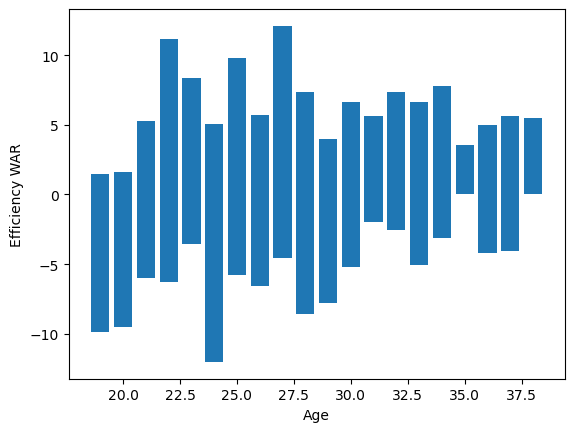

In [79]:
plt.bar('Age', "Efficiency WAR", data=df)
plt.xlabel('Age')
plt.ylabel('Efficiency WAR')
plt.show
# Younger players have wider range, more likely to be given more of a chance

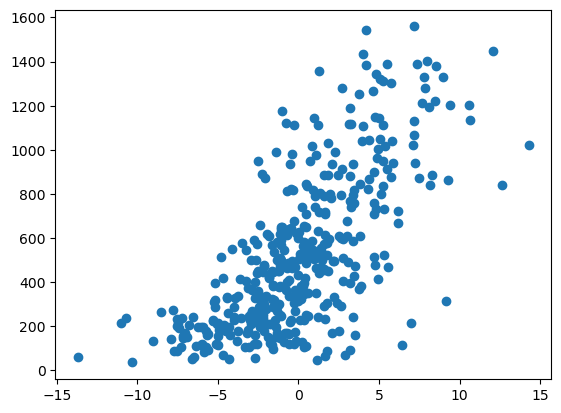

In [71]:
plt.scatter('Volume WAR', 'FGA', data=df)

In [72]:
sns.relplot(x="Efficiency WAR", y="FGA", hue="Pos", size="Age",
            sizes=(40, 400), palette="muted",
            height=6, data=df)


SyntaxError: invalid syntax (1470307556.py, line 3)

In [82]:
top_tips = df.nlargest(3, 'Volume WAR')


In [84]:
top_tips

,Rk_x,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,3PP_y,eFGP_y,FTP_y,TRB%_y,AST%_y,STL%_y,BLK%_y,TOV%_y,Efficiency WAR,Volume WAR
158,249,Nikola Jokić,C,27,DEN,69,69,2323,646,1022,...,0.050531,0.116767,0.054737,0.102496,0.323635,0.0033,0.00065,0.04801,12.098056,14.293613
118,186,Tyrese Haliburton,PG,22,IND,56,56,1883,412,841,...,0.067531,0.042767,0.103737,-0.039504,0.333635,0.0083,-0.00635,0.01001,11.143576,12.647068
78,125,Luka Dončić,PG,23,DAL,66,66,2391,719,1449,...,0.009531,0.016767,-0.025263,0.038496,0.280635,0.0043,-0.00535,-0.00299,8.355576,12.090709


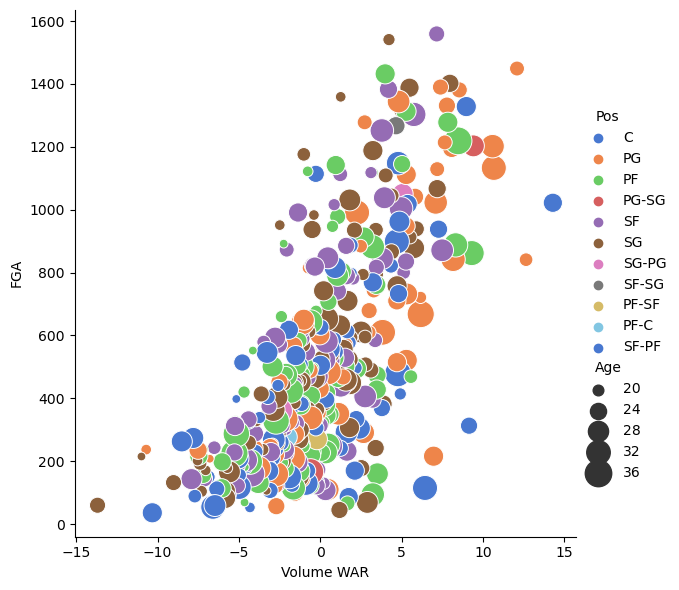

In [94]:
plot = sns.relplot(x="Volume WAR", y="FGA", hue="Pos", size="Age",
            sizes=(40, 400), palette="muted",
            height=6, data=df)
plt.show()

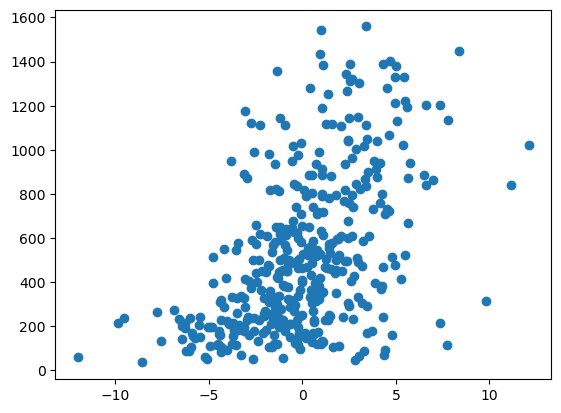

In [74]:
plt.scatter('Efficiency WAR', 'FGA', data=df)

/var/folders/2d/j6jx9fpn50dg6jt20l4qwxth0000gn/T/ipykernel_1024/2687437249.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  league = df.groupby('Tm').mean().drop('TOT', axis=0)


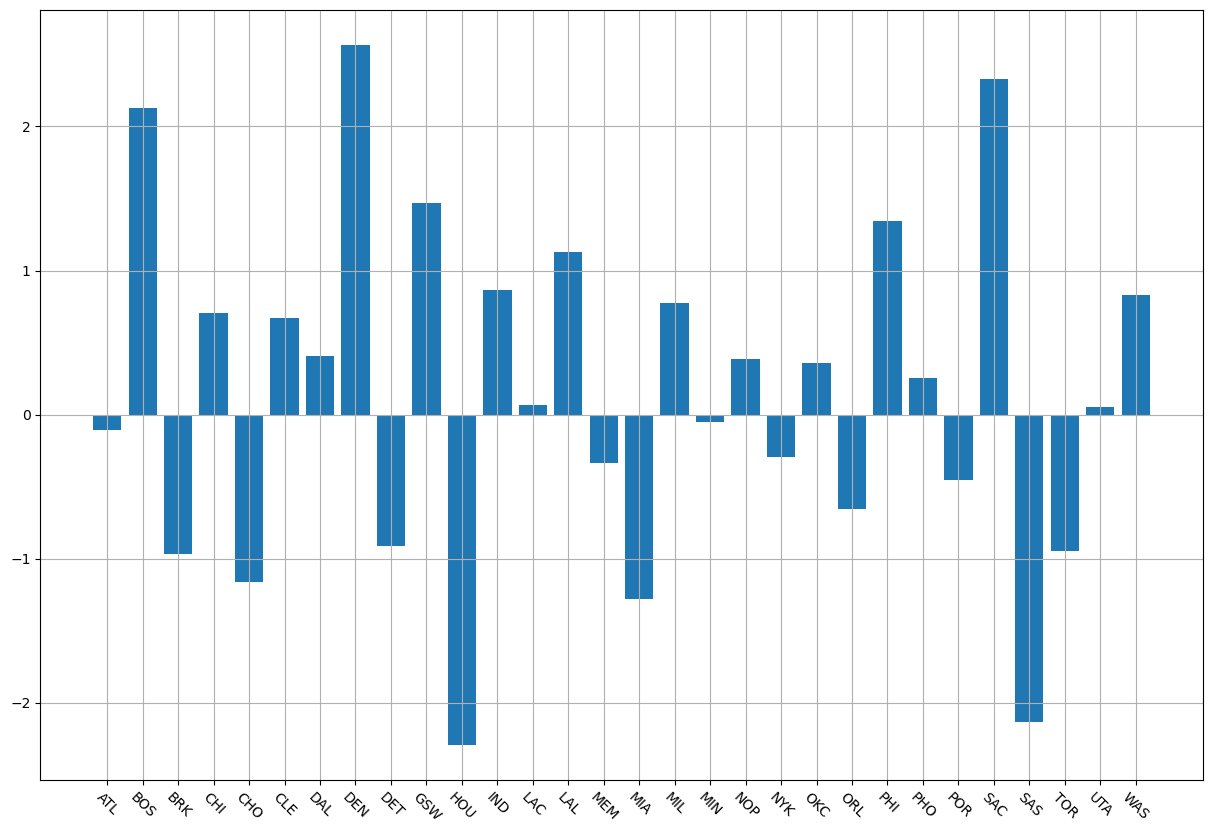

In [75]:
fig = plt.figure(figsize=(15,10))
league = df.groupby('Tm').mean().drop('TOT', axis=0)
plt.bar(league.index, 'Volume WAR', data=league)
plt.xticks(rotation=315)
plt.grid();

/var/folders/2d/j6jx9fpn50dg6jt20l4qwxth0000gn/T/ipykernel_1024/1163076413.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  league = df.groupby('Tm').sum().drop('TOT', axis=0).sort_values("Efficiency WAR", ascending=False)


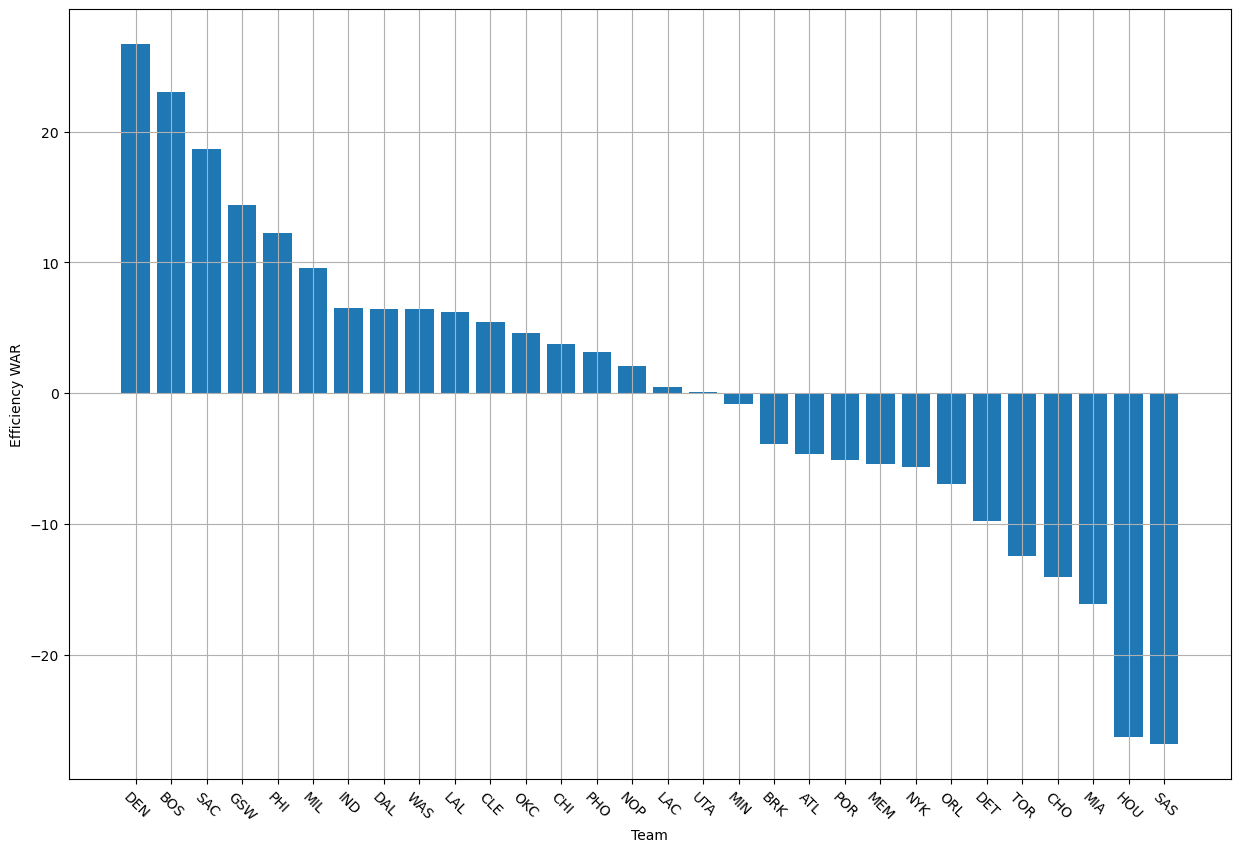

In [80]:
fig = plt.figure(figsize=(15,10))
league = df.groupby('Tm').sum().drop('TOT', axis=0).sort_values("Efficiency WAR", ascending=False)
plt.bar(league.index, 'Efficiency WAR', data=league)
plt.xticks(rotation=315)
plt.xlabel('Team')
plt.ylabel('Efficiency WAR')
plt.show
plt.grid();

/var/folders/2d/j6jx9fpn50dg6jt20l4qwxth0000gn/T/ipykernel_1024/3167015035.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  league = df.groupby('Tm').sum().drop('TOT', axis=0).sort_values("Volume WAR", ascending=False)


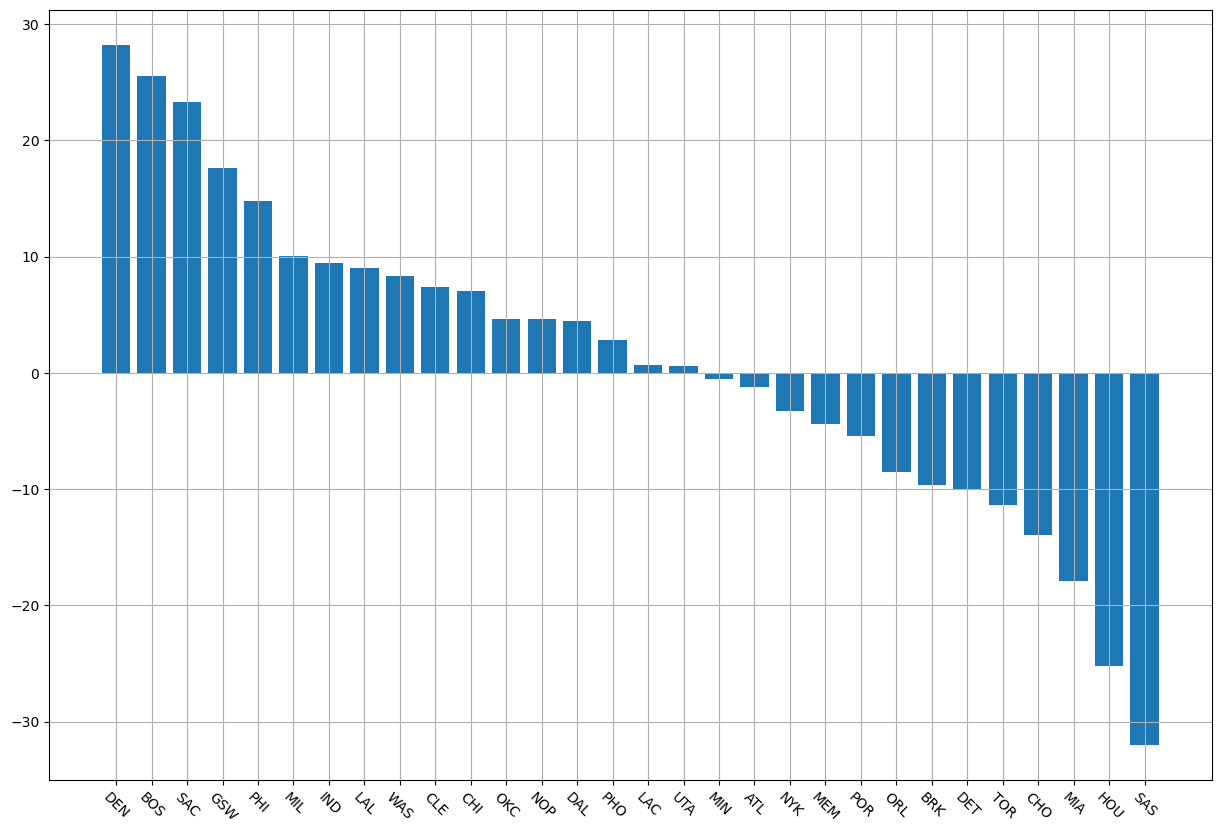

In [77]:
fig = plt.figure(figsize=(15,10))
league = df.groupby('Tm').sum().drop('TOT', axis=0).sort_values("Volume WAR", ascending=False)
plt.bar(league.index, 'Volume WAR', data=league)
plt.xticks(rotation=315)
plt.grid();

In [78]:
sortedWAR = df.sort_values('Efficiency WAR', ascending=False)
sortedWAR

,Rk_x,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,3PP_y,eFGP_y,FTP_y,TRB%_y,AST%_y,STL%_y,BLK%_y,TOV%_y,Efficiency WAR,Volume WAR
158,249,Nikola Jokić,C,27,DEN,69,69,2323,646,1022,...,0.050531,0.116767,0.054737,0.102496,0.323635,0.0033,0.00065,0.04801,12.098056,14.293613
118,186,Tyrese Haliburton,PG,22,IND,56,56,1883,412,841,...,0.067531,0.042767,0.103737,-0.039504,0.333635,0.0083,-0.00635,0.01001,11.143576,12.647068
262,412,Nick Richards,C,25,CHO,65,9,1217,197,313,...,0.667531,0.087767,-0.018263,0.082496,-0.097365,-0.0107,0.03365,0.00801,9.795496,9.142616
78,125,Luka Dončić,PG,23,DAL,66,66,2391,719,1449,...,0.009531,0.016767,-0.025263,0.038496,0.280635,0.0043,-0.00535,-0.00299,8.355576,12.090709
68,108,Stephen Curry,PG,34,GSW,56,56,1941,559,1133,...,0.094531,0.070767,0.147737,-0.002504,0.157635,-0.0017,-0.00835,0.00301,7.804536,10.664379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,-0.332469,0.053767,-0.403263,0.127496,-0.030365,0.0003,0.01965,0.07601,-7.804984,-8.515086
385,363,Nerlens Noel,C,28,TOT,17,4,195,13,36,...,0.167531,-0.168233,-0.100263,0.031496,-0.075365,0.0253,0.02765,0.11701,-8.585624,-10.328293
231,361,Daishen Nix,PG,20,HOU,57,7,914,81,237,...,-0.046469,-0.117233,-0.100263,-0.040504,0.049635,0.0013,-0.01035,0.13201,-9.520424,-10.704767
323,506,Blake Wesley,SG,19,SAS,37,1,669,69,215,...,0.052531,-0.176233,-0.176263,-0.033504,0.045635,0.0033,-0.01135,0.09501,-9.861544,-10.995568


In [90]:
df

,Rk_x,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,3PP_y,eFGP_y,FTP_y,TRB%_y,AST%_y,STL%_y,BLK%_y,TOV%_y,Efficiency WAR,Volume WAR
158,249,Nikola Jokić,C,27,DEN,69,69,2323,646,1022,...,0.050531,0.116767,0.054737,0.102496,0.323635,0.0033,0.00065,0.04801,12.098056,14.293613
118,186,Tyrese Haliburton,PG,22,IND,56,56,1883,412,841,...,0.067531,0.042767,0.103737,-0.039504,0.333635,0.0083,-0.00635,0.01001,11.143576,12.647068
262,412,Nick Richards,C,25,CHO,65,9,1217,197,313,...,0.667531,0.087767,-0.018263,0.082496,-0.097365,-0.0107,0.03365,0.00801,9.795496,9.142616
78,125,Luka Dončić,PG,23,DAL,66,66,2391,719,1449,...,0.009531,0.016767,-0.025263,0.038496,0.280635,0.0043,-0.00535,-0.00299,8.355576,12.090709
68,108,Stephen Curry,PG,34,GSW,56,56,1941,559,1133,...,0.094531,0.070767,0.147737,-0.002504,0.157635,-0.0017,-0.00835,0.00301,7.804536,10.664379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,-0.332469,0.053767,-0.403263,0.127496,-0.030365,0.0003,0.01965,0.07601,-7.804984,-8.515086
385,363,Nerlens Noel,C,28,TOT,17,4,195,13,36,...,0.167531,-0.168233,-0.100263,0.031496,-0.075365,0.0253,0.02765,0.11701,-8.585624,-10.328293
231,361,Daishen Nix,PG,20,HOU,57,7,914,81,237,...,-0.046469,-0.117233,-0.100263,-0.040504,0.049635,0.0013,-0.01035,0.13201,-9.520424,-10.704767
323,506,Blake Wesley,SG,19,SAS,37,1,669,69,215,...,0.052531,-0.176233,-0.176263,-0.033504,0.045635,0.0033,-0.01135,0.09501,-9.861544,-10.995568
